<a href="https://colab.research.google.com/github/bhandariarun/unemployment_analysis/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Unemployment_India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
print('Shape of the dataset : ',df.shape)

Shape of the dataset :  (768, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df = df.rename(columns={'Region':'States', 'Region.1':'Region'})
df.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.drop('Frequency', axis='columns', inplace=True)

df.head()

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


<Figure size 1600x1000 with 0 Axes>

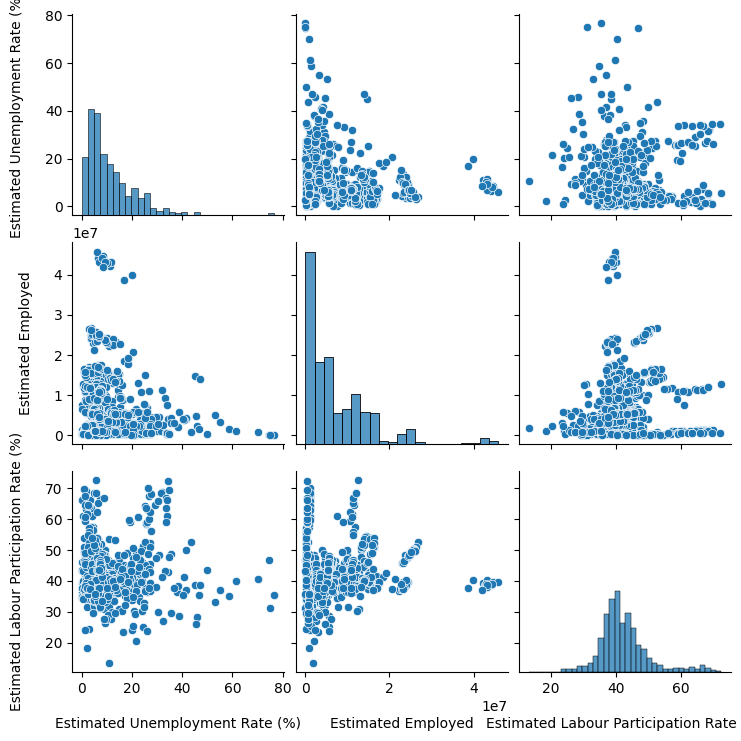

In [ ]:
plt.rc("axes", labelpad=15)
plt.figure(figsize=(16, 10))
sns.pairplot(data=df)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   States                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)          740 non-null    float64       
 3   Estimated Employed                       740 non-null    float64       
 4   Estimated Labour Participation Rate (%)  740 non-null    float64       
 5   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 36.1+ KB


In [ ]:
df['Month'] = df['Date'].dt.month

df.drop('Date', axis='columns', inplace=True)

df.head()

,States,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,9.0


<Axes: >

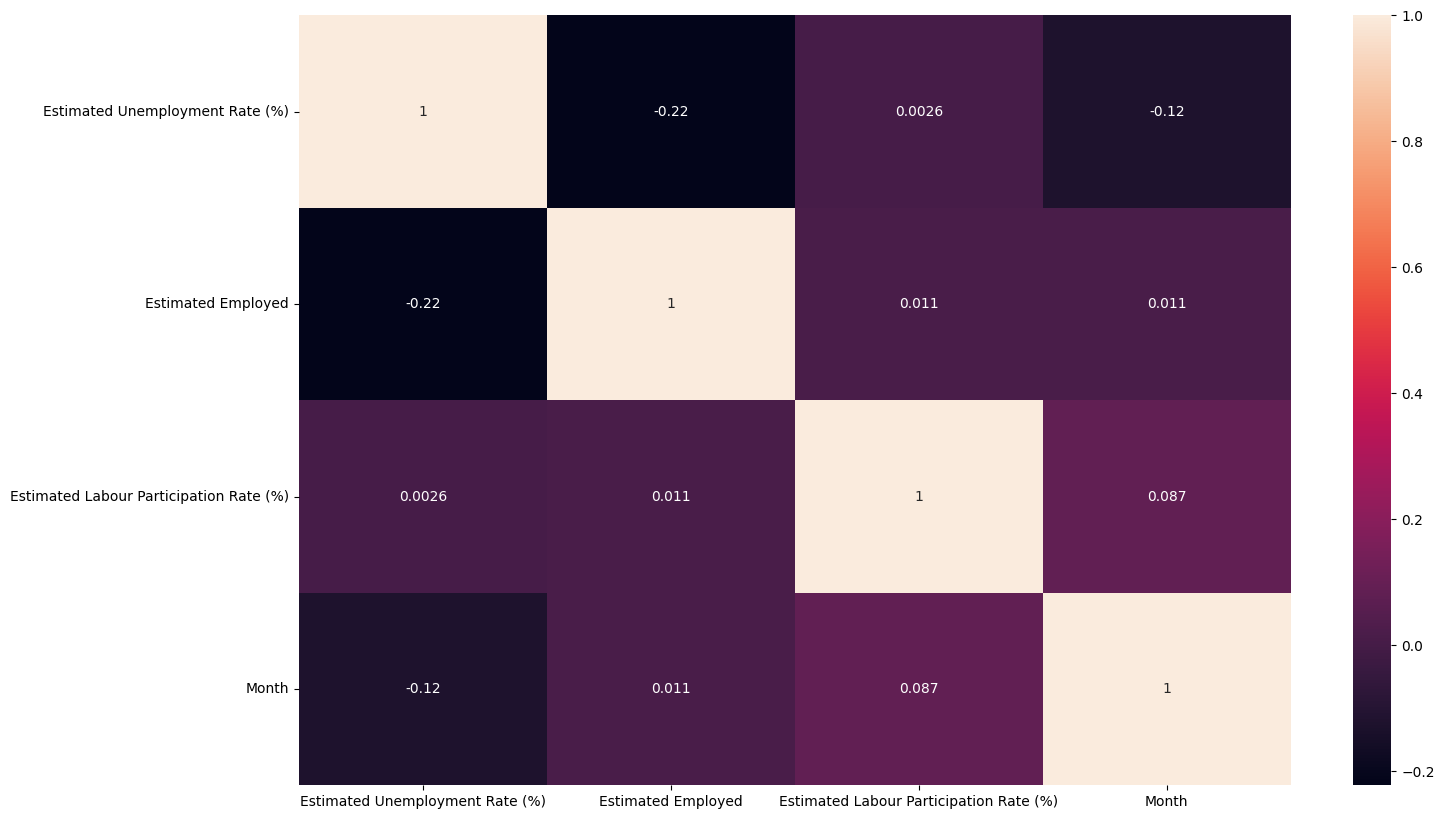

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

In [ ]:
df['States'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: States, dtype: int64

<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='States'>

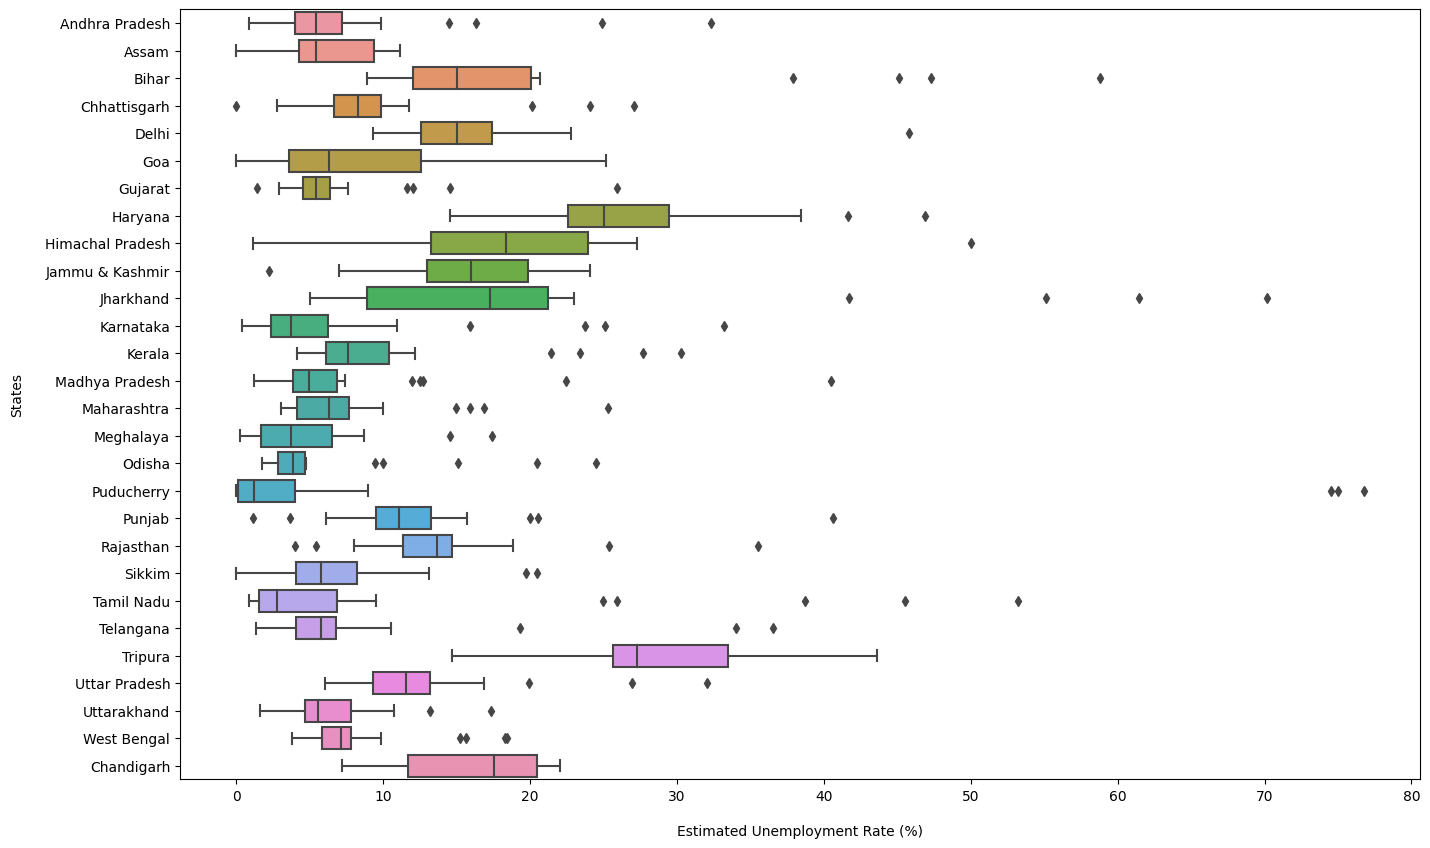

In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, y='States', x='Estimated Unemployment Rate (%)')

In [ ]:
aur_df = df[['States', 'Estimated Unemployment Rate (%)']].groupby('States').mean().reset_index()
aur_df = aur_df.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)

aur_df.head()

,States,Estimated Unemployment Rate (%)
24,Tripura,28.350357
8,Haryana,26.283214
11,Jharkhand,20.585000
2,Bihar,18.918214
9,Himachal Pradesh,18.540357


<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='States'>

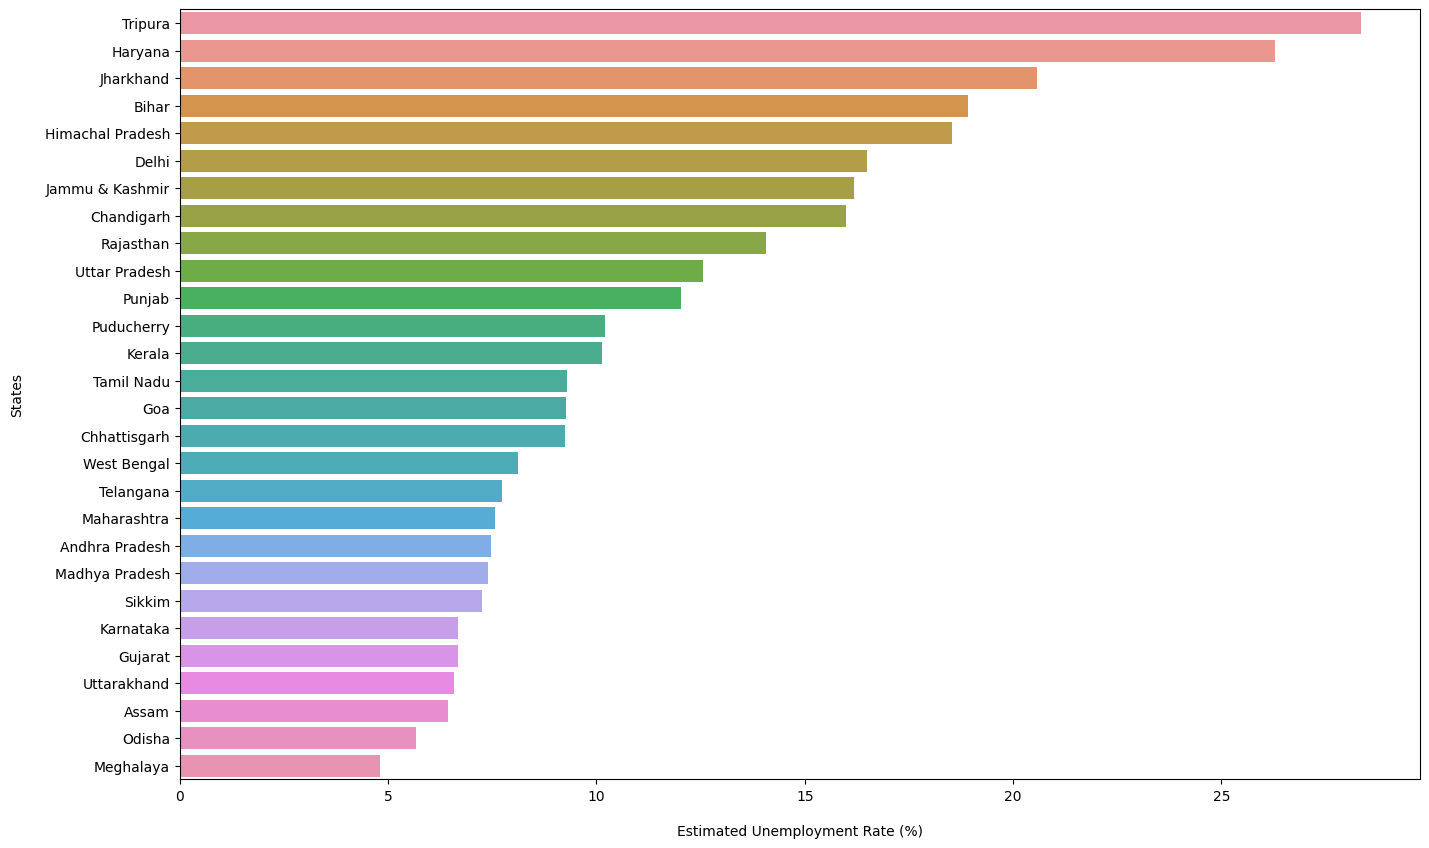

In [ ]:
plt.figure(figsize=(16, 10))
sns.barplot(data=aur_df, y='States', x='Estimated Unemployment Rate (%)')

In [ ]:
bf_lock_df = df[(df['Month'] >= 1) & (df['Month'] <= 3)][['States', 'Estimated Unemployment Rate (%)']]
af_lock_df = df[(df['Month'] >= 3) & (df['Month'] <= 5)][['States', 'Estimated Unemployment Rate (%)']]

In [ ]:
bf_lock_df = bf_lock_df.groupby('States')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(columns={'Estimated Unemployment Rate (%)':'Unemployment Rate before Lock-Down'})
af_lock_df = af_lock_df.groupby('States')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(columns={'Estimated Unemployment Rate (%)':'Unemployment Rate after Lock-Down'})

In [ ]:
bf_lock_df['Percentage Change in Unemployment'] = round((af_lock_df['Unemployment Rate after Lock-Down'] - bf_lock_df['Unemployment Rate before Lock-Down']) / bf_lock_df['Unemployment Rate before Lock-Down'], 2)

In [ ]:
bf_lock_df['Unemployment Rate after Lock-Down'] = af_lock_df['Unemployment Rate after Lock-Down']

In [ ]:
plot_df = bf_lock_df.sort_values('Percentage Change in Unemployment', ascending=False)

<Axes: xlabel='Percentage Change in Unemployment', ylabel='States'>

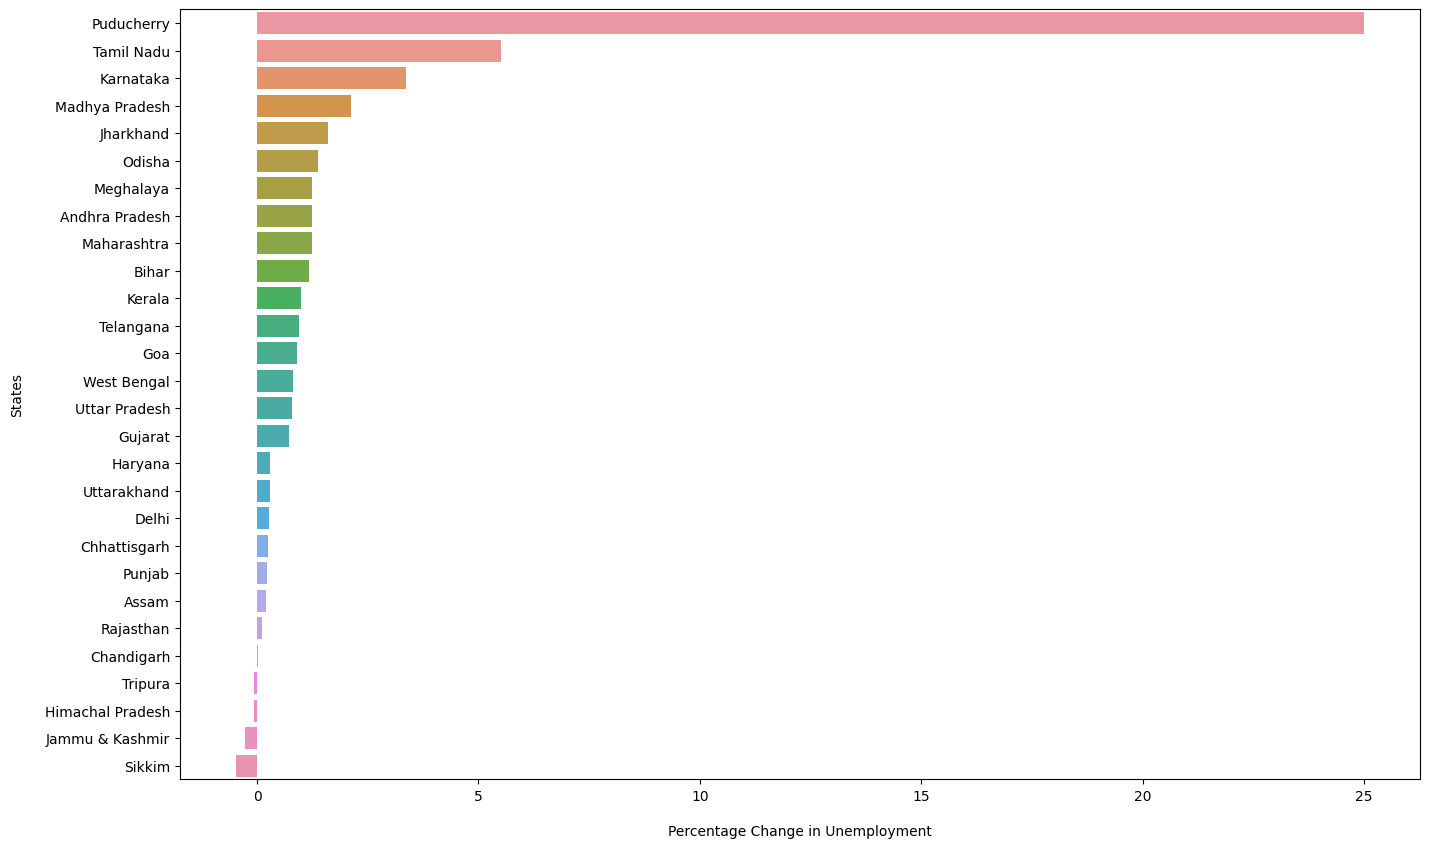

In [ ]:
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='States', x='Percentage Change in Unemployment')

In [ ]:
def sort_impact_level(x):
    if x > 20:
        return 'hardest impacted states'
    elif x > 10:
        return 'harder impacted states'
    elif x > 5:
        return 'hard impacted states'
    elif x > 0:
        return 'impacted states'
    else:
        return 'not impacted states'

In [ ]:
plot_df['Impact Status'] = plot_df['Percentage Change in Unemployment'].apply(lambda x:sort_impact_level(x))

<Axes: xlabel='Percentage Change in Unemployment', ylabel='States'>

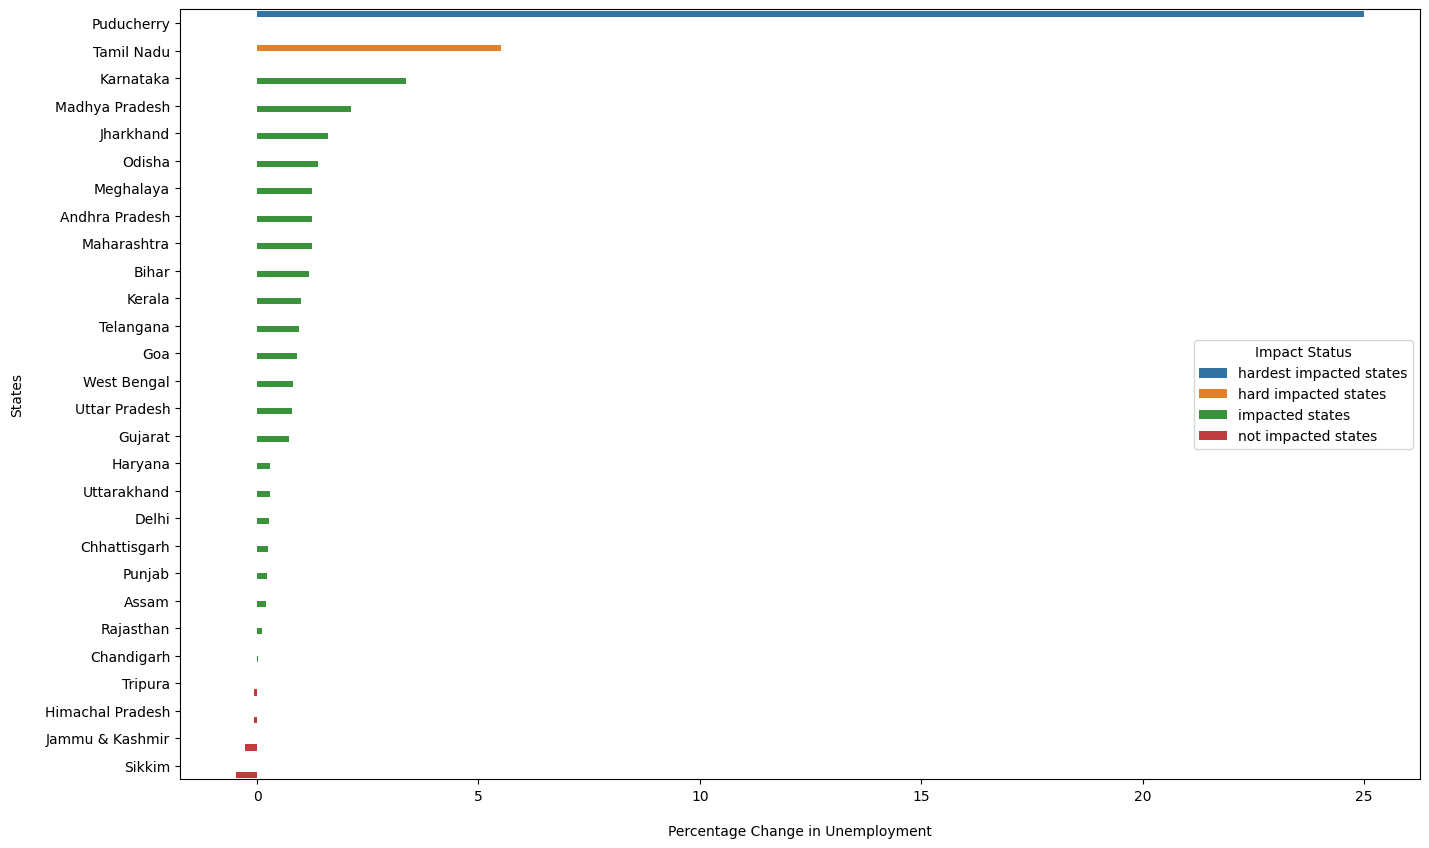

In [ ]:
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='States', x='Percentage Change in Unemployment', hue='Impact Status', width=0.9)